# Accessing Conflict Data
- [Armed Conflict Location & Event Data Website](https://acleddata.com/#/dashboard) 
- [API Guide](https://developer.acleddata.com/rehd/cms/views/acled_api/documents/API-User-Guide.pdf)
- [Dictionary](https://acleddata.com/acleddatanew//wp-content/uploads/2021/11/ACLED_Data-Columns_v1_April-2019.pdf)
- [Codebook](https://acleddata.com/acleddatanew//wp-content/uploads/2021/11/ACLED_Codebook_v1_January-2021.pdf)
- [Full Documentation](https://acleddata.com/resources/#1643628716684-37d18c29-1234)


In [3]:
#importing relevant packages
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_01_packages.py

In [26]:
# import useful functions
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py

In [27]:
#fetching hidden api key and username from desktop stored under 'conflict_api_key' and 'conflict_api_email'
%run /Users/thomasadler/Desktop/futuristic-platipus/keys.py

In [1]:
#defining working directory
filepath = '/Users/thomasadler/Desktop/capstone_docs/'

In [29]:
#setting API endpoint,
conflict_api_endpoint = "https://api.acleddata.com/acled/read"

In [30]:
#Uganda ISO code is 800
uganda_iso = 800

In [31]:
# sending post request
conflict_r = requests.get(
    f'{conflict_api_endpoint}?key={conflict_api_key}&email={conflict_api_email}&limit=0&iso={uganda_iso}.csv'
)

#saving as json data
data = conflict_r.json()

#extract events information
events = data['data']

#save to a dataframe
uganda_conflict = pd.DataFrame(events)

In [32]:
#leaving raw dataset untouched
uganda_conflict_df = uganda_conflict.copy()

In [33]:
#checking dataset
uganda_conflict_df.tail()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
7788,6876098,800,UGA5,5,1997-01-11,1997,1,Violence against civilians,Abduction/forced disappearance,LRA: Lords Resistance Army,...,Acholi-Bur,3.1258,32.9197,1,New York Times,International,LRA abduct an unknown number of people taking ...,0,1618581922,UGA
7789,6876117,800,UGA4,4,1997-01-08,1997,1,Battles,Armed clash,Military Forces of Uganda (1986-),...,Kasese,0.1833,30.0833,3,Local Source,Subnational,Battle between Ugandan army and ADF rebels - 2...,2,1618581759,UGA
7790,6876122,800,UGA3,3,1997-01-07,1997,1,Battles,Armed clash,Military Forces of Uganda (1986-),...,Nyabani,0.1358,30.3636,1,Local Source,Subnational,5 ADF rebels were killed when the Ugandan army...,5,1618581598,UGA
7791,6876154,800,UGA1,1,1997-01-01,1997,3,Battles,Armed clash,Military Forces of Uganda (1986-),...,Gulu,2.7667,32.3056,3,Africa Research Bulletin,Other,Ugandan army battled with LRA rebels - 4 rebel...,4,1618581296,UGA
7792,6876155,800,UGA2,2,1997-01-01,1997,3,Battles,Armed clash,Military Forces of Uganda (1986-),...,Mityana,0.4015,32.0452,3,Africa Research Bulletin,Other,Over 20 rebel groups believed to belong to Dun...,5,1618581439,UGA


In [34]:
#check data types
uganda_conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_id           7793 non-null   object
 1   iso               7793 non-null   object
 2   event_id_cnty     7793 non-null   object
 3   event_id_no_cnty  7793 non-null   object
 4   event_date        7793 non-null   object
 5   year              7793 non-null   object
 6   time_precision    7793 non-null   object
 7   event_type        7793 non-null   object
 8   sub_event_type    7793 non-null   object
 9   actor1            7793 non-null   object
 10  assoc_actor_1     7793 non-null   object
 11  inter1            7793 non-null   object
 12  actor2            7793 non-null   object
 13  assoc_actor_2     7793 non-null   object
 14  inter2            7793 non-null   object
 15  interaction       7793 non-null   object
 16  region            7793 non-null   object
 17  country       

In [35]:
#convert to number
num_columns = [
    'latitude',
    'longitude',
    'fatalities',
]

for col in num_columns:
    float_converter(uganda_conflict_df, col)

#check
uganda_conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           7793 non-null   object 
 1   iso               7793 non-null   object 
 2   event_id_cnty     7793 non-null   object 
 3   event_id_no_cnty  7793 non-null   object 
 4   event_date        7793 non-null   object 
 5   year              7793 non-null   object 
 6   time_precision    7793 non-null   object 
 7   event_type        7793 non-null   object 
 8   sub_event_type    7793 non-null   object 
 9   actor1            7793 non-null   object 
 10  assoc_actor_1     7793 non-null   object 
 11  inter1            7793 non-null   object 
 12  actor2            7793 non-null   object 
 13  assoc_actor_2     7793 non-null   object 
 14  inter2            7793 non-null   object 
 15  interaction       7793 non-null   object 
 16  region            7793 non-null   object 


In [36]:
#convert to datetime
date_converter(uganda_conflict_df, 'event_date')

#check
uganda_conflict_df['event_date']

0      2022-06-30
1      2022-06-29
2      2022-06-29
3      2022-06-27
4      2022-06-27
          ...    
7788   1997-01-11
7789   1997-01-08
7790   1997-01-07
7791   1997-01-01
7792   1997-01-01
Name: event_date, Length: 7793, dtype: datetime64[ns]

In [37]:
#drop irrelevant columns
uganda_conflict_df=pd.DataFrame(uganda_conflict_df.drop(columns=['time_precision', 'event_id_cnty','event_id_no_cnty',\
                                                              'geo_precision','timestamp','year',\
                                                             'iso','iso3', 'region','country']))

#check current columns
uganda_conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_id         7793 non-null   object        
 1   event_date      7793 non-null   datetime64[ns]
 2   event_type      7793 non-null   object        
 3   sub_event_type  7793 non-null   object        
 4   actor1          7793 non-null   object        
 5   assoc_actor_1   7793 non-null   object        
 6   inter1          7793 non-null   object        
 7   actor2          7793 non-null   object        
 8   assoc_actor_2   7793 non-null   object        
 9   inter2          7793 non-null   object        
 10  interaction     7793 non-null   object        
 11  admin1          7793 non-null   object        
 12  admin2          7793 non-null   object        
 13  admin3          7793 non-null   object        
 14  location        7793 non-null   object        
 15  lati

In [38]:
#checking administrative levels match the water dataset
print(
    'admin1 in the conflict dataset should be clean_adm1 in the water dataset, check with:',
    uganda_conflict_df['admin1'].head(1)[0])
print(
    'admin2 in the conflict dataset should be clean_adm2 in the water dataset, check with:',
    uganda_conflict_df['admin2'].head(1)[0])
print(
    'admin3 in the conflict dataset should be clean_adm3 in the water dataset, check with:',
    uganda_conflict_df['admin3'].head(1)[0])
print(
    'location in the conflict dataset should be clean_adm4 in the water dataset, check with:',
    uganda_conflict_df['location'].head(1)[0])

admin1 in the conflict dataset should be clean_adm1 in the water dataset, check with: Eastern
admin2 in the conflict dataset should be clean_adm2 in the water dataset, check with: Bukwo
admin3 in the conflict dataset should be clean_adm3 in the water dataset, check with: Kongasis
location in the conflict dataset should be clean_adm4 in the water dataset, check with: Chesower


In [39]:
#replacing column name to match other datasets
uganda_conflict_df.rename(columns={
    'admin1': 'clean_adm1',
    'admin2': 'clean_adm2',
    'admin3': 'clean_adm3',
    'location': 'clean_adm4'
},
                          inplace=True)

In [40]:
#checking null values and duplicated rows and columns
print(uganda_conflict_df.isna().sum().sum()>0,\
      uganda_conflict_df.duplicated().sum()>0,\
      uganda_conflict_df.T.duplicated().sum()>0)

False False False


In [41]:
#export to cleaned dataset to csv
uganda_conflict_df.to_csv(filepath + 'uganda_conflict_df_clean.csv')

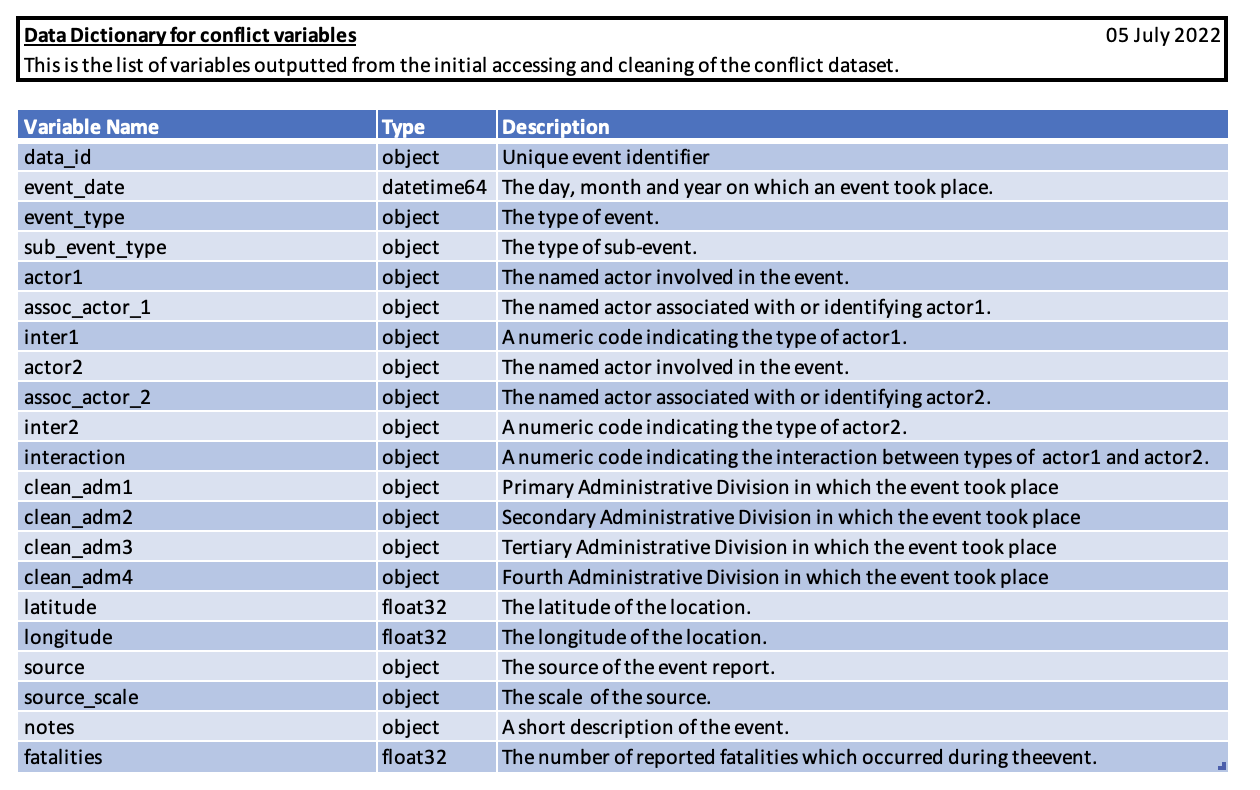

In [5]:
#data dictionary
Image("/Users/thomasadler/Desktop/futuristic-platipus/data_dictionary/3A-Conflict-Dictionary.png")